# SYRIA-TEL CUSTOMER CHURN PREDICTION

# Project Overview:

Customer churn, or the termination of a customer's service, is a major problem for SyriaTel, a well-known telecommunications provider. This can result in lost revenue and decreased market competitiveness. This project intends to reveal predictive patterns and create workable strategies to keep customers and reduce revenue loss by utilizing data analysis and machine learning.


# Business Understanding
## Problem Statement

Customer attrition was a major problem for Syria Tel, a well-known telecom provider. Thus, clients are discontinuing their services with Syria Tel, which has an impact on the stability and revenue of the business. The challenge is anticipating when clients might depart and figuring out why they would like to. Syria Tel seeks to stop this from occurring and maintain client satisfaction.



### Main objective
The project's aim is to develop a classifier capable of accurately identifying customers likely to churn, enabling SyriaTel to implement effective churn prevention strategies. By reducing turnover and enhancing profitability, SyriaTel seeks to optimize its business performance. The primary objective is to leverage data analysis and machine learning to establish an efficient churn prediction system tailored to SyriaTel's needs.

#### Key objectives 

- Crafting precise machine learning models to predict customer attrition using historical data.
- Analyzing consumer behavior patterns and trends associated with churn.
- Utilizing feature engineering techniques to enhance churn prediction models.
- Evaluating model performance and adjusting hyperparameters for optimal accuracy.
- Providing actionable insights and recommendations to facilitate the implementation of successful customer retention strategies.

# DATA UNDERSTANDING
This dataset was extracted from Kaggle 

Dataset Features Include:

- State: The customer's state of residence.
- Account Length: The duration of the customer's account in days.
- Area Code: The area code associated with the customer.
- Phone Number: The customer's phone number.
- International Plan: True if the customer has an international plan, otherwise False.
- Voice Mail Plan: True if the customer has a voicemail plan, otherwise False.
- Number Vmail Messages: The number of voicemails the customer has sent.
- Total Day Minutes: The total number of minutes the customer spent on calls during the day.
- Total Day Calls: The total number of calls the customer made during the day.
- Total Day Charge: The total amount of money charged by the Telecom company for calls during the day.
- Total Eve Minutes: The total number of minutes the customer spent on calls during the evening.
- Total Eve Calls: The total number of calls the customer made during the evening.
- Total Eve Charge: The total amount of money charged by the Telecom company for calls during the evening.
- Total Night Minutes: The total number of minutes the customer spent on calls during the night.
- Total Night Calls: The total number of calls the customer made during the night.
- Total Night Charge: The total amount of money charged by the Telecom company for calls during the night.
- Total Intl Minutes: The total number of minutes the customer spent on international calls.
- Total Intl Calls: The total number of international calls the customer made.
- Total Intl Charge: The total amount of money charged by the Telecom company for international calls.
- Customer Service Calls: The number of calls the customer made to customer service.
- Churn: True if the customer terminated their contract, otherwise False.

# DATA PREPARATION

In [57]:
#Import necessary libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('bigml_churn_predictions.csv')
#first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#last five rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# number of rows and column in the data
df.shape

(3333, 21)

In [6]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#Data statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Data cleaning

In [8]:
#checking for missing values in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [9]:
# check for duplicate values
df.duplicated().sum()

0

Obsevation
- There are no duplicates or missing values in our dataset.

##### Feature Engineering

In [10]:
# Drop unnecessary columns as this may not be relevant for predicting churn
df.drop(columns=['phone number', 'state'], inplace=True)

In [11]:
# Label encoding for binary categorical variables to convert them to interger(1 or 0)
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

##### From the feature engineering analysis above:
It appears that the phone number, will not play a significant role in the analysis since its private information, so it was dropped together with state since we can use area code as a geographical reference 

Also converted the international plan, voice mail plan, and churn variables to numerical categorical via label encoder.

#### Numerical features 

In [12]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical features:")
print(numerical_features)

Numerical features:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


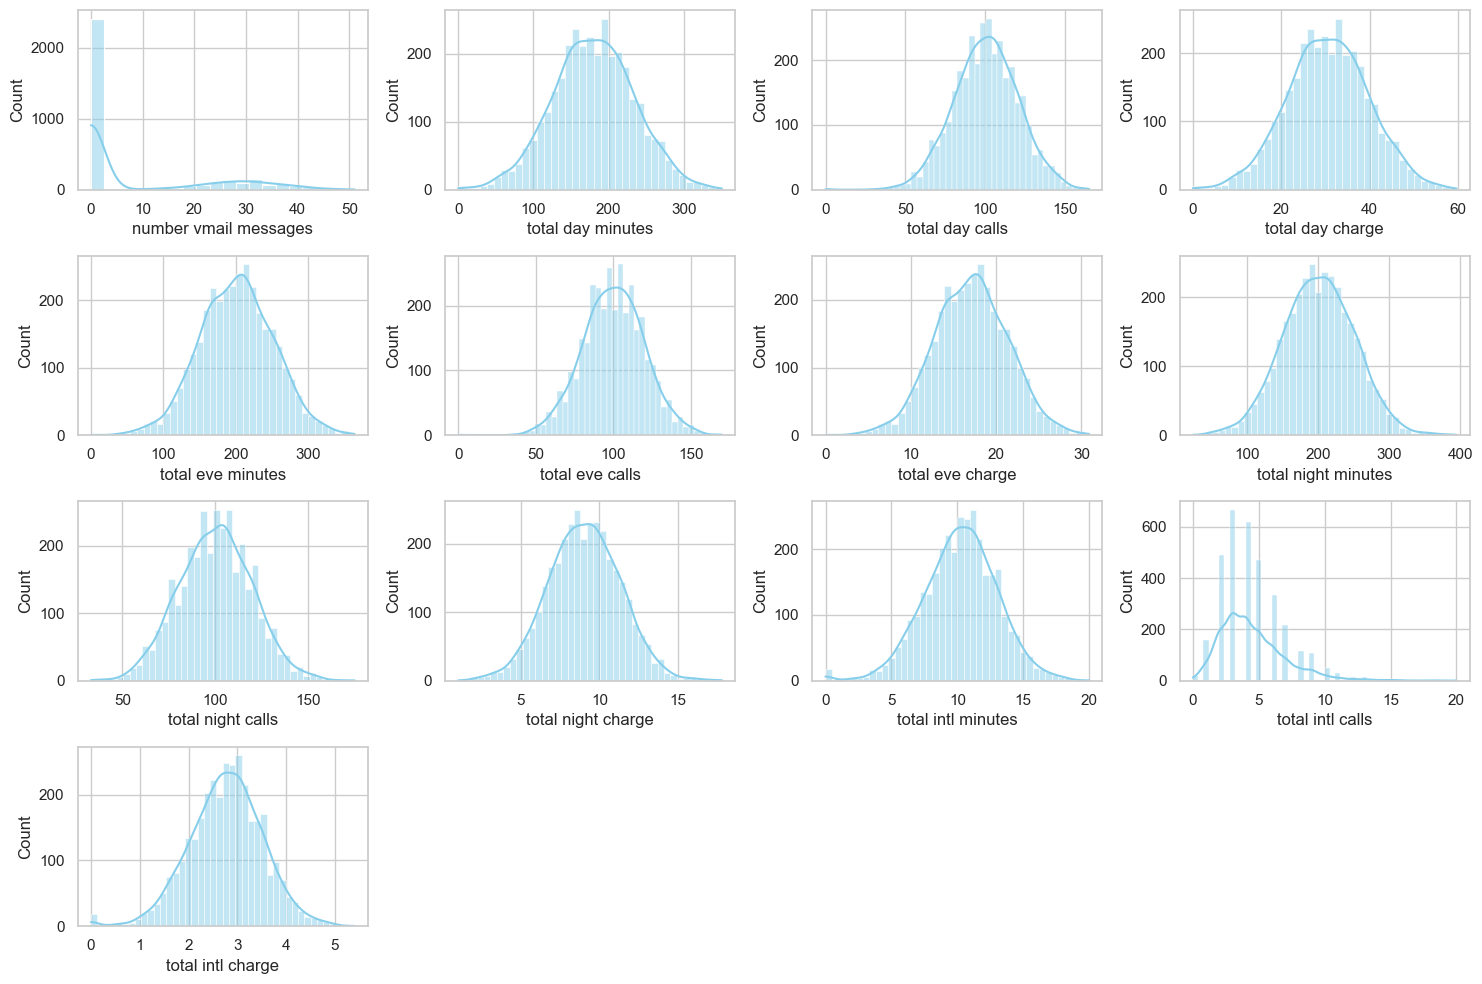

In [17]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features 
numerical_features = ['number vmail messages', 'total day minutes', 'total day calls',
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    
    # Convert infinite values to NaN before plotting
    data = df[feature].replace([np.inf, -np.inf], np.nan)
    
    sns.histplot(data.dropna(), color='skyblue', kde=True)  # kde=True adds a kernel density estimate
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


### Explanatory Data Analysis

####  - Distribution of churn

In [18]:
#inspect the dependent variable
df.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [19]:
# count of churn rate
df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

The distribution of the two classes in the data set is unequal, resulting in data imbalance. This imbalance can lead to inaccurate predictions by the model, highlighting the importance of addressing this issue prior to modeling.

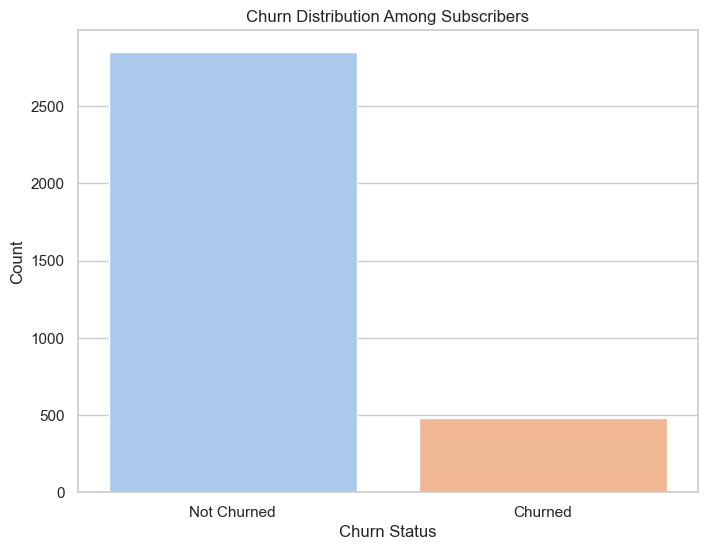

In [20]:
# Churn distribution among subscribers
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df, palette='pastel')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Distribution Among Subscribers')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

- This visualization depicts the count of subscribers categorized by churn status, revealing a notable proportion of customers who have terminated their service ("Churned"), underscoring potential challenges in revenue retention and customer retention efforts.

In [21]:
#calculate the percentage of churn
churn_rate = round(sum(df.churn) / len(df.churn) * 100, 2)

print('Churn Rate: {0}%'.format(churn_rate))

Churn Rate: 14.49%


- With a churn rate of 14.5%, SyriaTel's customer turnover is notably lower than the industry average of 21%, reflecting the effectiveness of its retention strategies compared to other telecommunications companies

#### Distribution of  account length

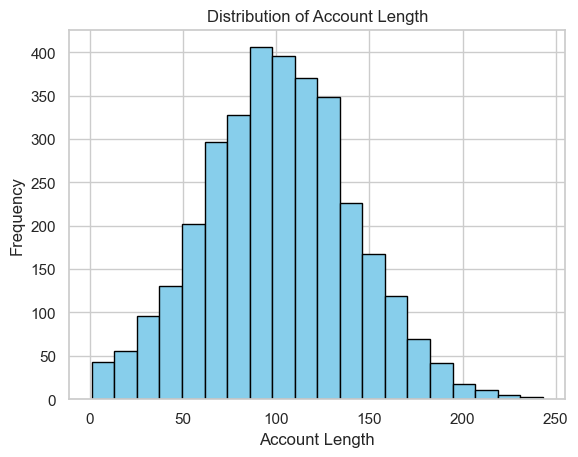

In [22]:
# Histogram for account length
plt.hist(df['account length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Account Length')
plt.show()

The normal distribution of account lengths indicates a stable customer base with consistent tenure durations, reflecting satisfaction with SyriaTel's services. While encouraging, further analysis is needed to uncover factors influencing churn and enhance retention strategies, ensuring long-term customer loyalty and business success.

#### Churn distribution by international plan 

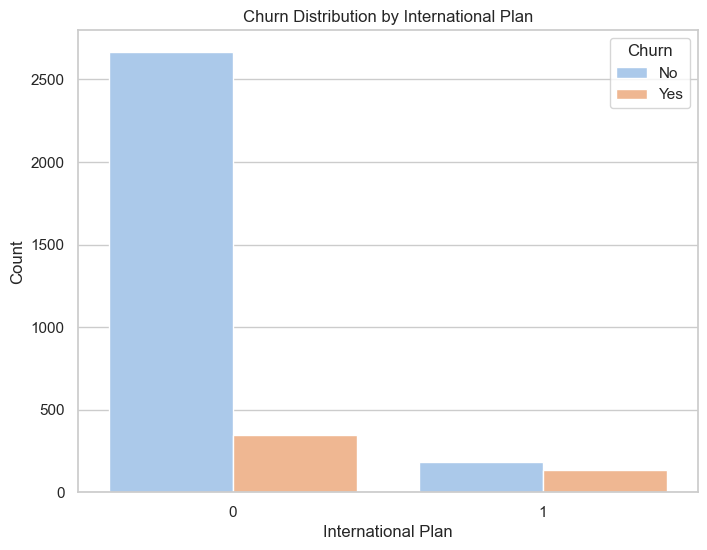

In [23]:
#Churn distribution by international plan
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='pastel')
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

- This indicates a notably higher churn rate among customers with an international plan compared to those without, suggesting that having an international plan might contribute to a higher likelihood of churn.

#### Churn distribution by voice mail plan

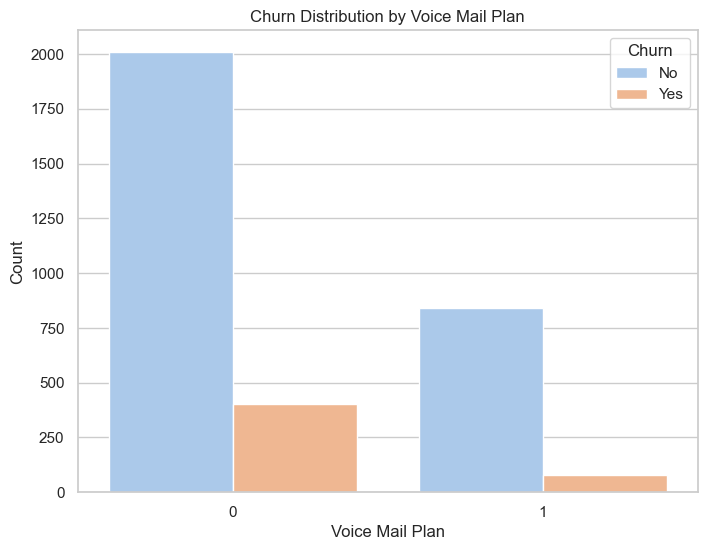

In [24]:
# Churn distribution by voice mail plan
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='pastel')
plt.title('Churn Distribution by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

- This suggests a slightly higher churn rate among customers with a voice mail plan compared to those without, indicating a potential but minor influence on churn behavior.

#### Distribution of customer service  calls

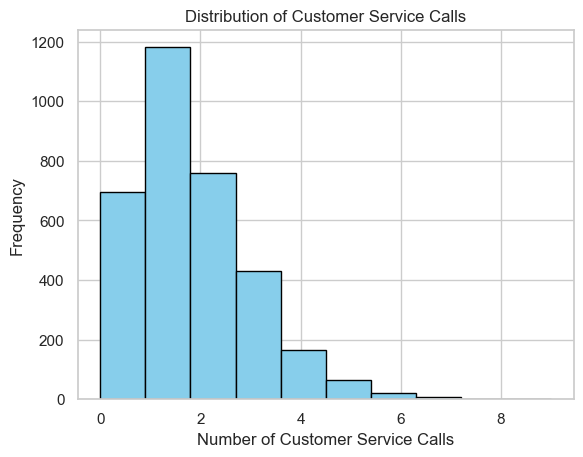

In [25]:
# Analysis of customer service calls
plt.hist(df['customer service calls'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Service Calls')
plt.show()

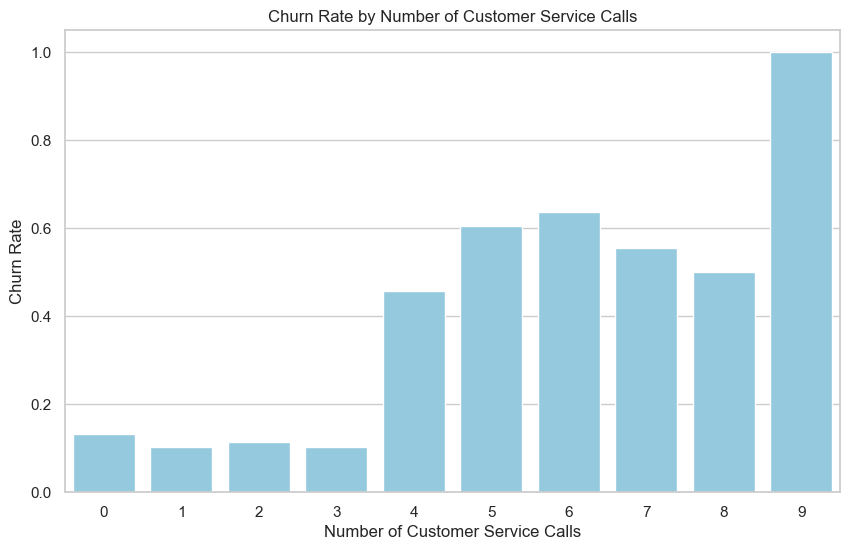

In [26]:
# Group data by number of customer service calls and calculate churn rate
churn_rate_by_calls = df.groupby('customer service calls')['churn'].mean()

# Plot churn rate by number of customer service calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_calls.index, y=churn_rate_by_calls.values, color='skyblue')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.show()

- The bar plot illustrates the relationship between the number of customer service calls and churn rate, indicating that higher churn rates are associated with increased customer service interactions.

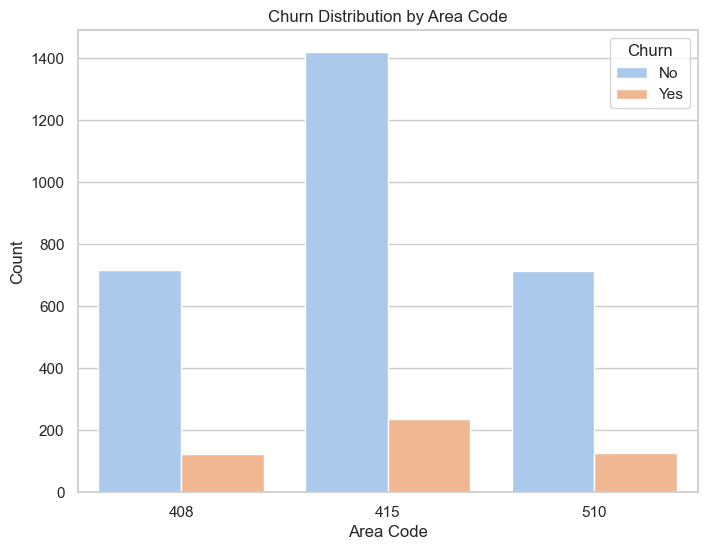

In [30]:
# Churn distribution by area code
plt.figure(figsize=(8, 6))
sns.countplot(x='area code', hue='churn', data=df, palette='pastel')
plt.title('Churn Distribution by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

Based on the analysis, it can be inferred that area codes 408 and 510 exhibit comparatively lower customer churn rates compared to area code 415. This observation is partially attributed to the higher churn rate and larger customer base associated with area code 415. However, when considering the average churn rate for each area code, the disparities become relatively balanced.

#### Removing outliers 

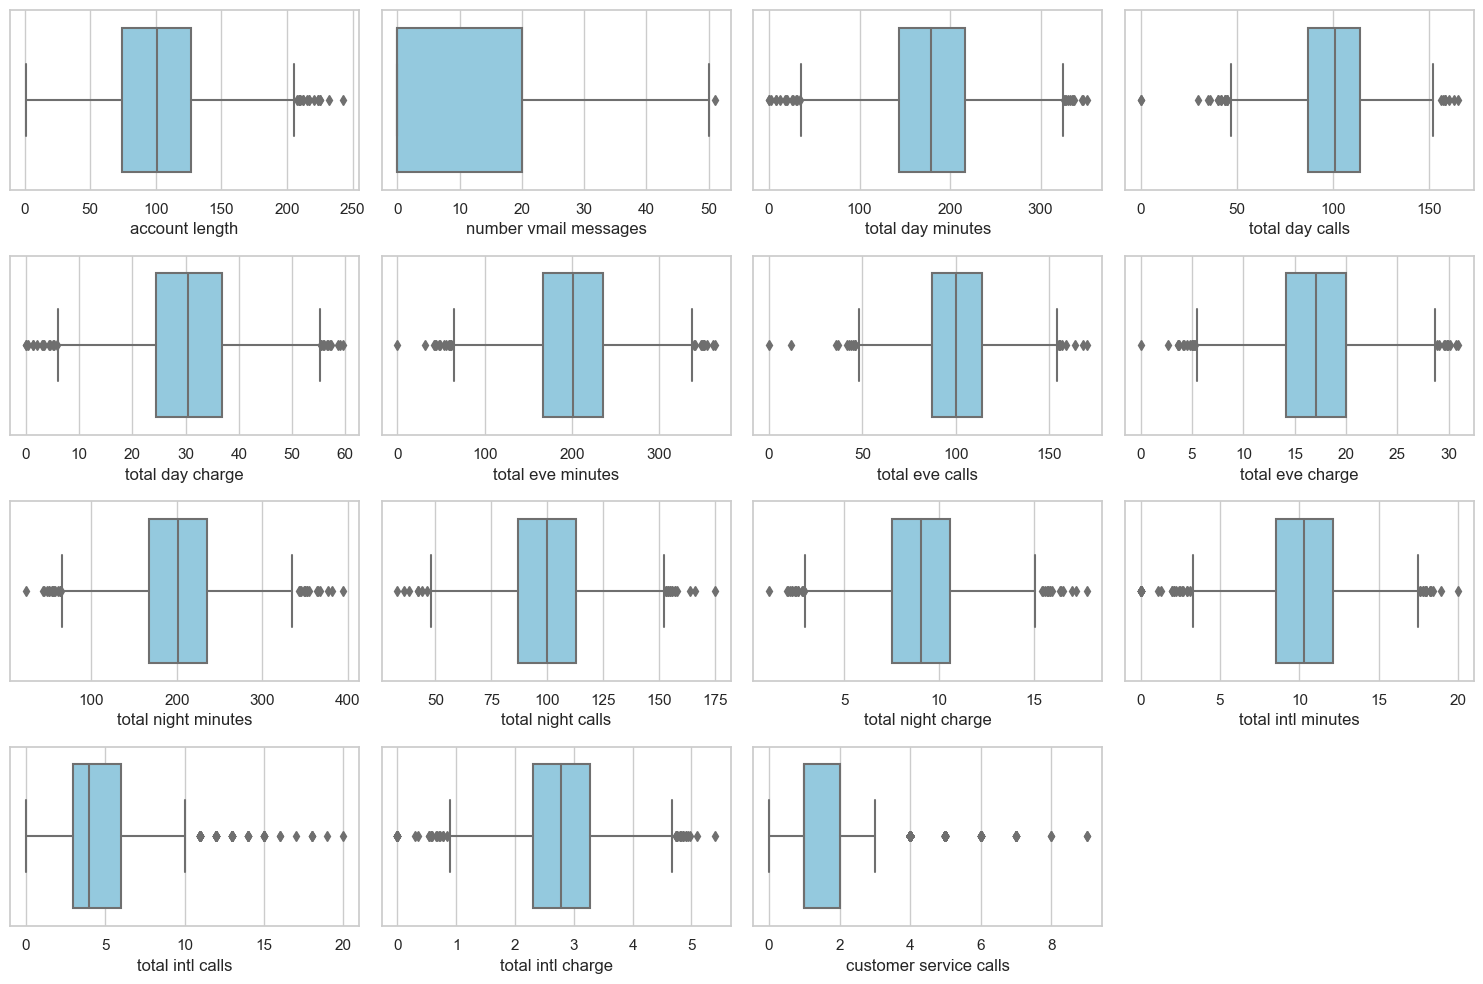

In [31]:
# Detecting outliers in numerical features
plt.figure(figsize=(15, 10))

# Plot box plots for numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge', 'customer service calls']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

As a result, the above-mentioned outliers will remain.

Argument: These really are anomalies. The majority of the inquiries concern phone talk time. Presumably, a customer could converse incessantly or infrequently for 350 minutes every day. The data will not be altered because the length is insufficient to remove the outliers.

In [32]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Sort correlation values with respect to 'churn'
correlation_with_churn = corr_matrix['churn'].sort_values(ascending=False)

print("Attributes with the highest correlation with 'churn':")
print(correlation_with_churn)

Attributes with the highest correlation with 'churn':
churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


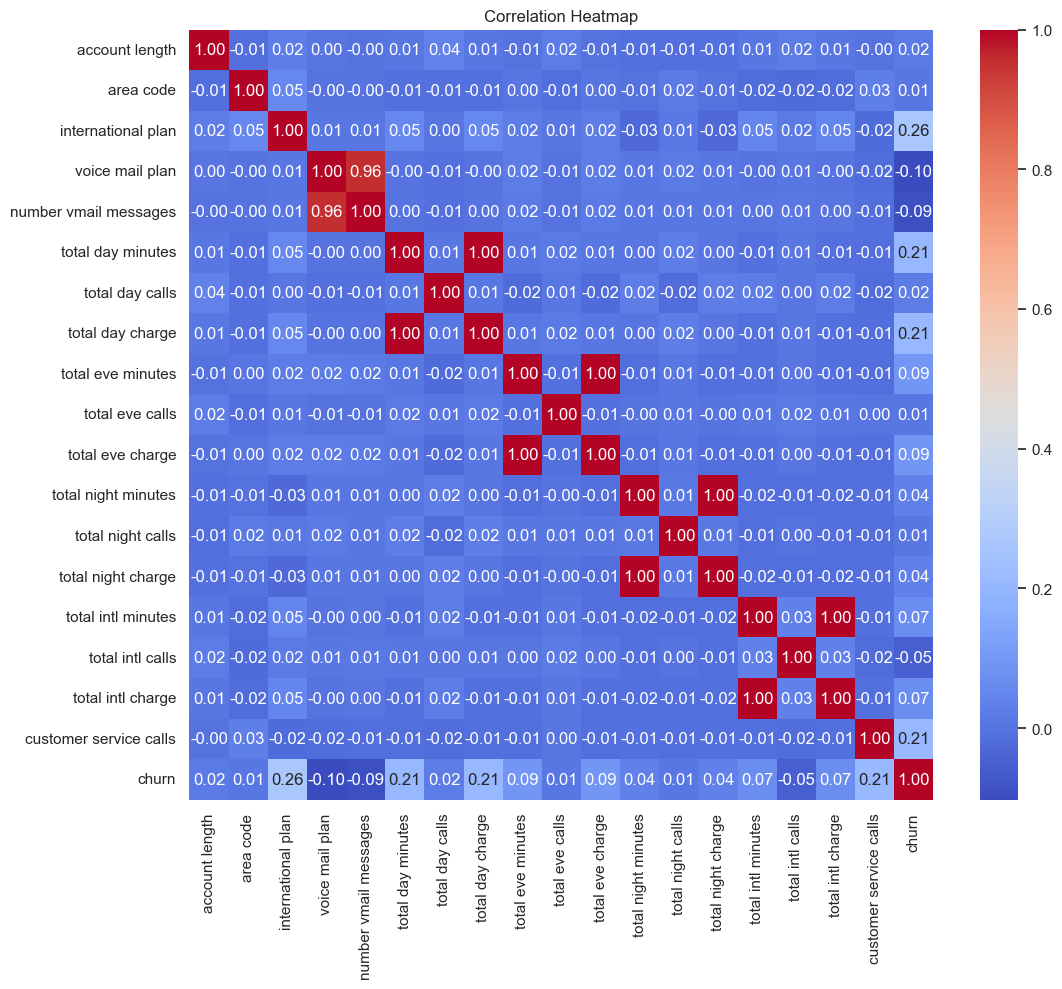

In [33]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Certain features have a perfect correlation of 1, indicating a high correlation. As a result of the charges being directly correlated with the usage, which in this case is minutes, these features are linear. The following show multicollinearity:


  - Total int charge and total int minutes
  
  - Total night charge and total night minutes
  
  - Total eve charge and total eve minutes
  
   - Total day charge and total day minutes

In [34]:
def drop_multicollinearity(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Find the highly correlated features
    highly_correlated = corr_matrix.mask(mask).stack().sort_values(ascending=False)

    # Identify variables with correlation above the threshold
    correlated_vars = highly_correlated[highly_correlated > threshold].index.get_level_values(0)

    # Drop the highly correlated variables from the DataFrame
    df_dropped = df.drop(columns=correlated_vars)

    return df_dropped

# Apply the function to drop highly correlated features
df = drop_multicollinearity(df)

print("The reduced dataframe has {} columns.".format(df.shape[1]))


The reduced dataframe has 14 columns.


In [35]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts(normalize=True))

churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## Modelling

#### Linear Regression Model
A classification technique used in machine learning is called logistic regression. When targeting a variable with two classes, it works well for binary classification tasks. The logistic regression model is the best fit for predicting the class of the target variable since the variable, churn, has two classes. When compared to other models, this one will serve as the baseline.

This analysis will use Recall as the evaluation metric. It aims at improving the metric to 75%

In [36]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Print sizes to verify split
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 2666
Testing set size: 667


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with scaled data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8575712143928036
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.59      0.19      0.29       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



The logistic regression model achieved an overall accuracy of 0.8576, indicating that it correctly classified approximately 85.76% of the instances in the dataset. However, when focusing on the recall metric, which measures the model's ability to correctly identify true positives (instances of churn), the performance is relatively lower.

For class 0 (non-churn), the model exhibited a high recall of 0.98, indicating that it correctly identified 98% of the actual non-churn instances. Conversely, for class 1 (churn), the recall was considerably lower at 0.19, suggesting that the model only captured 19% of the actual churn instances.

The precision, which represents the accuracy of positive predictions, was 0.87 for class 0 and 0.59 for class 1. This means that 87% of the instances predicted as non-churn were indeed non-churn, while only 59% of the instances predicted as churn were true churn instances.

The model achieved an accuracy of 85.76% but showed a relatively lower recall for churn instances (class 1) at 19%. This indicates that while it performs well in identifying non-churn instances (class 0), it struggles to detect churn cases. Improving recall for churn instances is essential to enhance model effectiveness.

#### Feature Importance

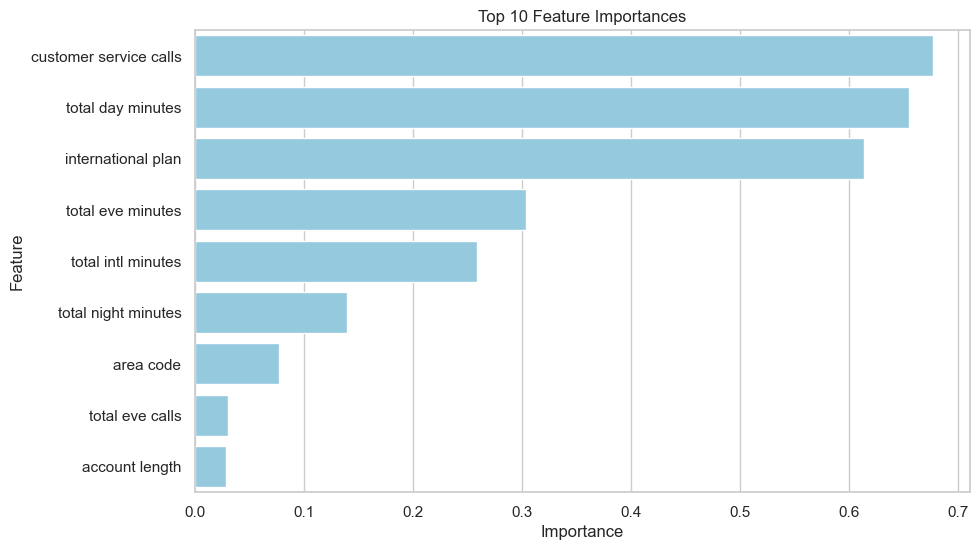

In [41]:
# Get feature importances
feature_importances = logistic_regression.coef_[0]

# Filter out negative feature importances
positive_feature_importances = feature_importances[feature_importances > 0]

# Get corresponding feature names
positive_feature_names = X.columns[feature_importances > 0]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': positive_feature_names, 'Importance': positive_feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 feature importances 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature importance analysis helps identify the key features driving predictions.These features with higher importance values, play a crucial role in determining whether a customer is likely to churn or not. For instance, a higher number of customer service calls may indicate dissatisfaction or issues with the service, leading to a higher probability of churn. Similarly, customers who spend more time on calls during the day or evening, especially if they have an international plan, may exhibit different behavior patterns that contribute to churn.

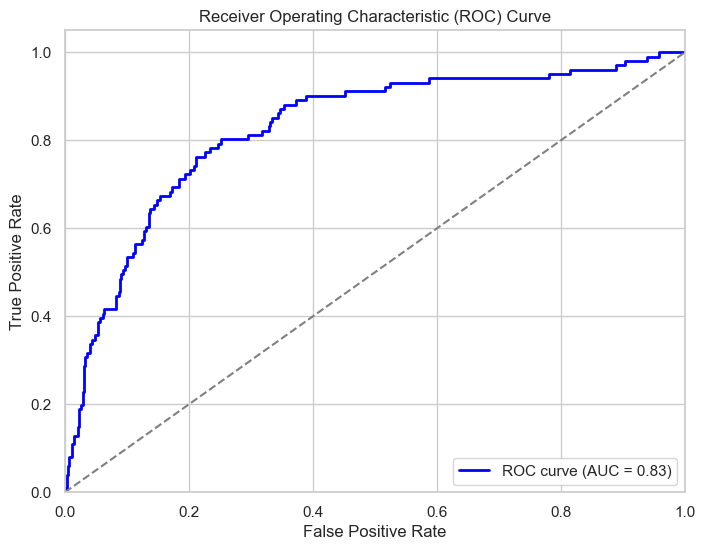

In [42]:
# Compute predicted probabilities for the positive class
y_probs = logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC AUC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across various thresholds. An AUC of 0.83 indicates good discriminatory power, suggesting the model effectively ranks positive instances. The curve plots the true positive rate against the false positive rate, with an AUC closer to 1 indicating better model performance.Although creating a more complex model will help this analysis better.

#### Confusion Matrix

The confusion matrix provides a detailed breakdown of model predictions. It shows the number of true positive, true negative, false positive, and false negative predictions. A heatmap visualization enhances readability, with darker shades indicating higher values. The confusion matrix helps assess model performance, particularly in identifying false positives and false negatives.

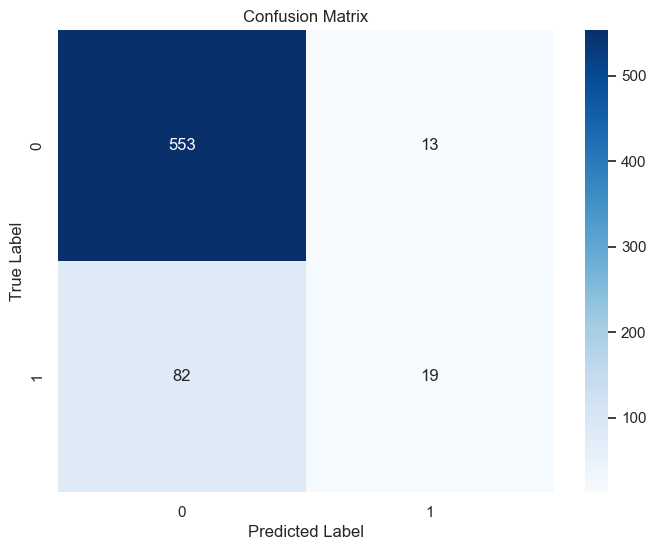

In [43]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier

The Random Forest Classifier is a powerful ensemble learning method that combines multiple decision trees to make predictions. It's known for its robustness and ability to handle complex datasets effectively. This analysis trained the Random Forest Classifier on scaled data and evaluated its performance using recall as the primary metric.

In [44]:
# Initialize and train the Random Forest Classifier with scaled data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9415292353823088
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       566
           1       0.96      0.64      0.77       101

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



- Accuracy: The model achieves an impressive accuracy of 94.15%, indicating its overall effectiveness in correctly classifying both churned and non-churned customers.

- Precision: Both precision scores for class 0 (non-churn) and class 1 (churn) are high, suggesting that the model makes accurate positive predictions for both classes.

- Recall: The recall for class 0 is exceptionally high at 99%, indicating that the model correctly identifies almost all non-churned customers. For class 1, the recall is also significantly higher than in the logistic regression model, reaching 64%. This suggests that the Random Forest Classifier performs substantially better in identifying churned customers compared to the logistic regression model.

- F1-score: The F1-scores for both classes are high, indicating a good balance between precision and recall for both non-churned and churned customers.

#### Feature Importance

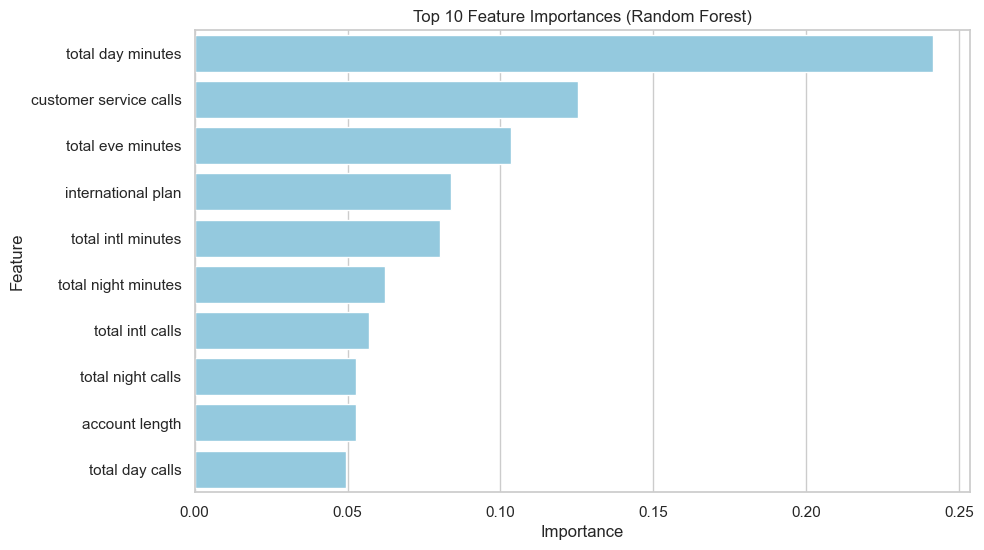

In [45]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Get corresponding feature names
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='skyblue')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In the Random Forest Classifier, the most significant features for predicting churn include Total Day Minutes, Customer Service Calls, Total Eve Minutes, and having an International Plan. These features indicate various aspects of customer behavior and service usage that strongly influence the likelihood of churn. Specifically, customers who spend more time on daytime and evening calls, make frequent customer service calls, or have an international plan are more prone to churn.

#### ROC AUC curve

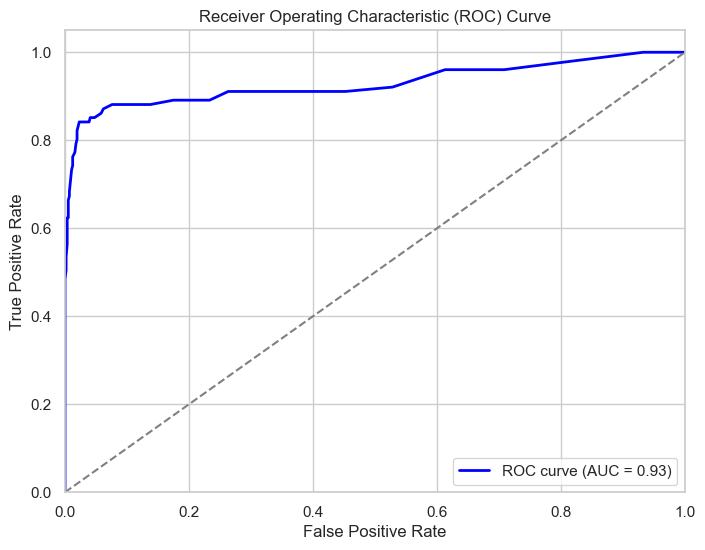

In [46]:
# Compute predicted probabilities for the positive class
y_probs = random_forest.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

An ROC AUC score of 0.93 indicates that the Random Forest Classifier model has a high discriminatory power and performs well in distinguishing between positive and negative instances. Specifically, it correctly ranks a higher proportion of positive instances (churned customers) compared to negative instances (non-churned customers).

#### Confusion Matrix

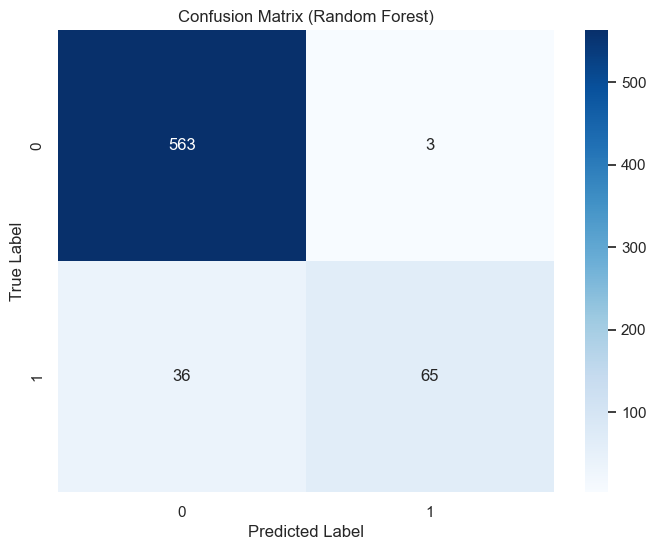

In [47]:
# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest.predict(X_test_scaled)

# Compute confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for the Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Hyperparameter Tuning

Hyperparameter tuning was performed to optimize the performance of the gradient boosting classifier by finding the best combination of hyperparameters. This process helps improve the model's ability to generalize to new, unseen data and enhances its predictive accuracy. By systematically searching through different hyperparameter values, the aim is to identify the configuration that maximizes the model's performance, particularly in terms of the desired metric, which in this case was recall.

In [55]:

# Define a wider range for the learning rate and number of estimators
param_grid = {
    'n_estimators': [200, 250, 300],
    'learning_rate': np.linspace(0.01, 0.5, 20),  # Wider range for learning rate
    'max_depth': [5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV with scoring as 'recall' and increased iterations
random_search = RandomizedSearchCV(estimator=gradient_boosting, param_distributions=param_grid, 
                                   n_iter=200, cv=5, scoring='recall', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 9, 'learning_rate': 0.16473684210526315}
Accuracy: 0.9565217391304348
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.92      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



Accuracy: The Gradient Boosting Classifier achieves an accuracy of 95.65%, showcasing its robustness in correctly classifying both churned and non-churned customers.

Precision: With high precision scores for both non-churn (96%) and churn (92%) instances, the model demonstrates accurate positive predictions for both classes.

Recall: The recall for non-churn instances is notably high at 99%, indicating the model's ability to correctly identify the majority of non-churned customers. For churn instances, the recall stands at 78%, indicating substantial improvement over the logistic regression model and showcasing the Gradient Boosting Classifier's effectiveness in identifying churned customers.

F1-score: The F1-score, a harmonic mean of precision and recall, reflects the balance between the two metrics. The model achieves an F1-score of 97% for non-churn instances and 84% for churn instances, indicating a good balance between precision and recall for both classes.

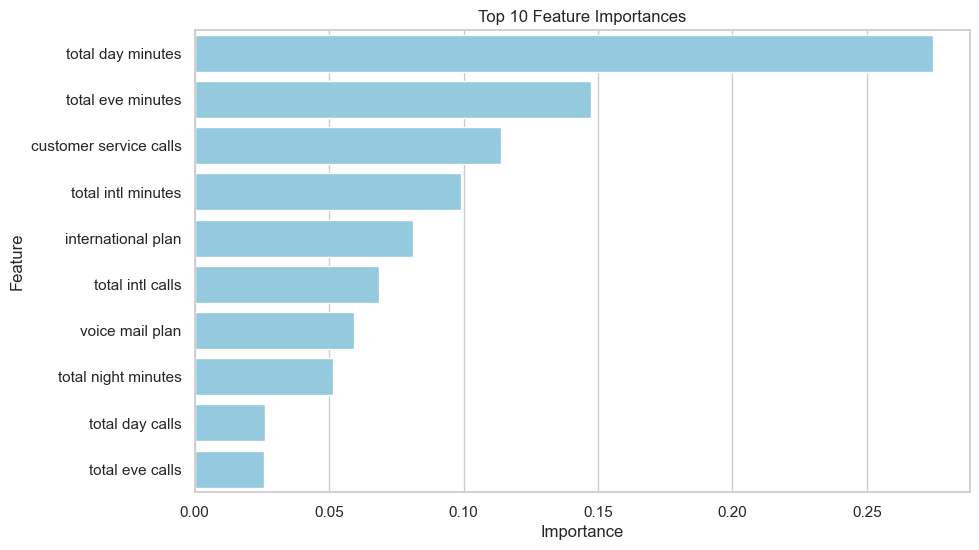

In [62]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Get indices of top 10 most important features 
top_10_indices = np.argsort(feature_importances)[::-1][:10]

# Get corresponding feature names
top_10_feature_names = X.columns[top_10_indices]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': top_10_feature_names, 'Importance': feature_importances[top_10_indices]})

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Total Day Minutes: This metric tracks the total duration of daytime calls. It reflects customer engagement patterns, where extremes in call duration may signal varied behaviors impacting churn risk.Also Customer Service Calls  tallies the count of customer service callsas higher counts may signify service dissatisfaction or unresolved issues, potentially elevating churn probabilities.

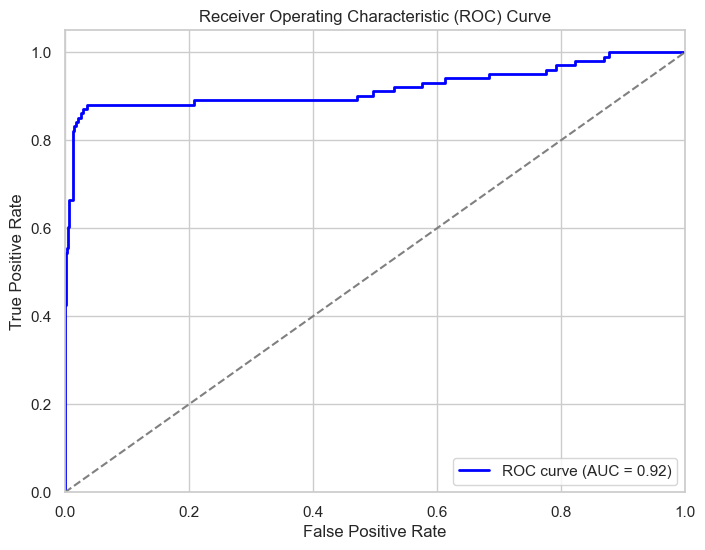

In [63]:
# Compute predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Recommendations


1. Targeted Marketing Campaigns: Utilize insights from the model to design targeted marketing campaigns aimed at retaining customers identified as at-risk for churn. Offer personalized incentives or discounts to encourage retention.

2. Customer Engagement Strategies: Focus on improving customer satisfaction and engagement. Enhance customer service quality, streamline communication channels, and provide timely support to resolve issues effectively.Customer care agents could be trained on giving a better customer experience to reduce the churn that increases with customer service calls

3. Subscription Plan Optimization: Analyze customer usage patterns and preferences to tailor subscription plans that better suit individual needs. Offer flexible plans, add-on services, or customization options to increase customer satisfaction and loyalty.

4. Proactive Customer Retention: Implement proactive retention strategies such as loyalty programs, exclusive offers, or proactive outreach to high-value customers identified by the model as at-risk for churn.

5. Continuous Model Monitoring: Continuously monitor model performance and recalibrate as needed to ensure its effectiveness over time. Regularly update the model with new data to adapt to evolving customer behaviors and market dynamics.

# Conclusions:

Predictive Power of Machine Learning: Machine learning models such as logistic regression, random forest, and gradient boosting can effectively predict customer churn based on historical data and customer attributes.

Feature Importance: Certain features, such as customer service interactions can affect high churn so  Customer care agents could be trained better on giving a better customer experience to reduce the churn that increases with customer service calls.

Successful Achievement of Recall Target: Through hyperparameter tuning and model selection, the project successfully achieved the target recall of 75%, indicating the model's effectiveness in identifying churned customers.

Continuous Improvement: The analysis is an iterative process, and there's always room for improvement. Regularly evaluate and refine the predictive models to enhance their accuracy and relevance in predicting customer churn.